# Machine Learning based Multivariate Time Series Forecasting of ISO New England Electricity Demand

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('covid-19.csv')

In [3]:
df.head()

,Date,Cured,Deaths,Confirmed
0,3/2/2020,0.0,0.0,1.0
1,3/3/2020,0.0,0.0,1.0
2,3/4/2020,0.0,0.0,1.0
3,3/5/2020,0.0,0.0,2.0
4,3/6/2020,0.0,0.0,3.0


# Implementation of Machine Learning Algorithm

1- Random Forest

2- CatBoost

3- XGBoost

4- Prophet 


**Stationarity Check**

In [4]:
from statsmodels.tsa.stattools import adfuller
covid = pd.read_csv("covid-19.csv")

# ADF test for 'death' column
death_adf = adfuller(covid['Deaths'])
print("ADF test for 'Deaths' column:")
print(f"ADF Statistic: {death_adf[0]:.4f}")
print(f"p-value: {death_adf[1]:.4f}")
print("Critical Values:")
for key, value in death_adf[4].items():
    print(f"   {key}: {value:.4f}")
    
# ADF test for 'drybulb' column
Cured_adf = adfuller(covid['Cured'])
print("\nADF test for 'Cured' column:")
print(f"ADF Statistic: {Cured_adf[0]:.4f}")
print(f"p-value: {Cured_adf[1]:.4f}")
print("Critical Values:")
for key, value in Cured_adf[4].items():
    print(f"   {key}: {value:.4f}")
    
# ADF test for 'Confirmed' column
Confirmed_adf = adfuller(covid['Confirmed'])
print("\nADF test for 'Confirmed' column:")
print(f"ADF Statistic: {Confirmed_adf[0]:.4f}")
print(f"p-value: {Confirmed_adf[1]:.4f}")
print("Critical Values:")
for key, value in Confirmed_adf[4].items():
    print(f"   {key}: {value:.4f}")



ADF test for 'Deaths' column:
ADF Statistic: -1.0177
p-value: 0.7467
Critical Values:
   1%: -3.4395
   5%: -2.8656
   10%: -2.5689

ADF test for 'Cured' column:
ADF Statistic: -0.9152
p-value: 0.7829
Critical Values:
   1%: -3.4394
   5%: -2.8655
   10%: -2.5689

ADF test for 'Confirmed' column:
ADF Statistic: -0.9817
p-value: 0.7599
Critical Values:
   1%: -3.4393
   5%: -2.8655
   10%: -2.5689


# 1- Random Forest

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('covid-19.csv', index_col='Date', parse_dates=True)
df = df[['Deaths', 'Cured','Confirmed']]

# Create a lagged version of the demand variable to use as features
df['Deaths_lagged'] = df['Deaths'].shift()

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Split the training and testing sets into features and target variables
train_X, train_y = train[['Deaths_lagged', 'Cured', 'Confirmed']], train['Deaths']
test_X, test_y = test[['Deaths_lagged', 'Cured', 'Confirmed']], test['Deaths']

In [6]:
# Fit a Random Forest model to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)


In [7]:
train_X = train_X.fillna(1)

In [8]:
rf_model.fit(train_X, train_y)


RandomForestRegressor(random_state=0)

In [9]:
# Make predictions on the test data
predictions = rf_model.predict(test_X)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(test_y, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 19540.629669137765


**Model Evaluation**

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate the mean squared error of the predictions
mse = mean_squared_error(test_y, predictions)
print('Mean Squared Error:', mse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error
mae = mean_absolute_error(test_y, predictions)
print('Mean Absolute Error:', mae)

# Calculate the R2 score
r2 = r2_score(test_y, predictions)
print('R2 Score:', r2)

Mean Squared Error: 19540.629669137765
Root Mean Squared Error: 139.7878022902491
Mean Absolute Error: 121.49999819998993
R2 Score: -3.089383689336967


**Visualization(s)**

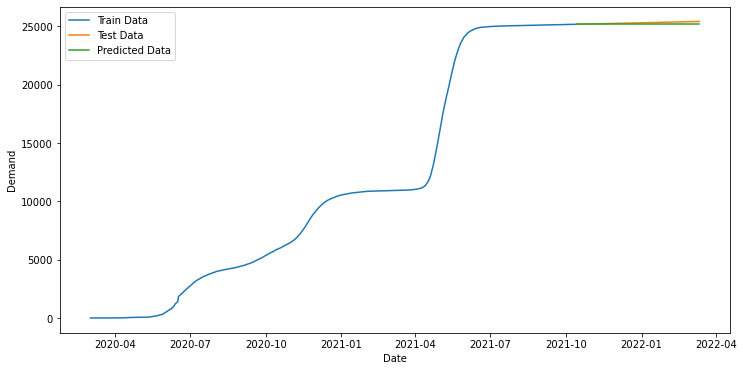

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot the actual values, training predictions, and testing predictions
plt.plot(train_y.index, train_y, label='Train Data')
plt.plot(test_y.index, test_y, label='Test Data')
plt.plot(test_y.index, predictions, label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

# CATBOOST Algorithm

In [35]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split



In [36]:
# Load the data
df = pd.read_csv('covid-19.csv', index_col='Date', parse_dates=True)
df = df[['Deaths', 'Cured','Confirmed']]


In [37]:
# Create a lagged version of the demand variable to use as features
df['Deaths_lagged'] = df['Deaths'].shift()



In [38]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]



In [39]:
# Split the training and testing sets into features and target variables
train_X, train_y = train[['Deaths_lagged', 'Cured', 'Confirmed']], train['Deaths']
test_X, test_y = test[['Deaths_lagged', 'Cured', 'Confirmed']], test['Deaths']


In [40]:
# Fill missing values in the training and testing data
train_X = train_X.fillna(1)
test_X = test_X.fillna(1)



In [41]:
from catboost import CatBoostRegressor, Pool

# Convert the data into CatBoost's Pool format
train_pool = Pool(train_X, train_y)
test_pool = Pool(test_X, test_y)



In [42]:
# Define the CatBoost model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=0)



In [43]:
# Fit the model to the training data
catboost_model.fit(train_pool)



0:	learn: 8243.8791311	total: 1.36ms	remaining: 135ms
1:	learn: 7476.7839040	total: 2.89ms	remaining: 141ms
2:	learn: 6814.0688868	total: 4.64ms	remaining: 150ms
3:	learn: 6215.9488202	total: 5.5ms	remaining: 132ms
4:	learn: 5667.6130126	total: 6.58ms	remaining: 125ms
5:	learn: 5140.5350835	total: 7.75ms	remaining: 121ms
6:	learn: 4671.8869650	total: 8.79ms	remaining: 117ms
7:	learn: 4251.9821519	total: 10.3ms	remaining: 118ms
8:	learn: 3847.8790828	total: 12ms	remaining: 121ms
9:	learn: 3500.6590653	total: 13.2ms	remaining: 119ms
10:	learn: 3167.4998761	total: 14.3ms	remaining: 116ms
11:	learn: 2878.7606824	total: 15.3ms	remaining: 112ms
12:	learn: 2613.5360734	total: 16.3ms	remaining: 109ms
13:	learn: 2373.4066848	total: 17.4ms	remaining: 107ms
14:	learn: 2153.6578632	total: 18.3ms	remaining: 104ms
15:	learn: 1960.0835316	total: 19.3ms	remaining: 101ms
16:	learn: 1780.5101148	total: 21.3ms	remaining: 104ms
17:	learn: 1628.3647170	total: 23.1ms	remaining: 105ms
18:	learn: 1484.2520339

In [46]:
# Make predictions on the test data
predictions = catboost_model.predict(test_pool)



**Model Evaluation**

In [48]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(test_y, predictions)
print('Mean Squared Error:', mse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error
mae = mean_absolute_error(test_y, predictions)
print('Mean Absolute Error:', mae)

# Calculate the R2 score
r2 = r2_score(test_y, predictions)
print('R2 Score:', r2)


Mean Squared Error: 40768.267417523464
Root Mean Squared Error: 201.91153364165075
Mean Absolute Error: 189.7100084628728
R2 Score: -7.531817584315574


**Visualization(s)**

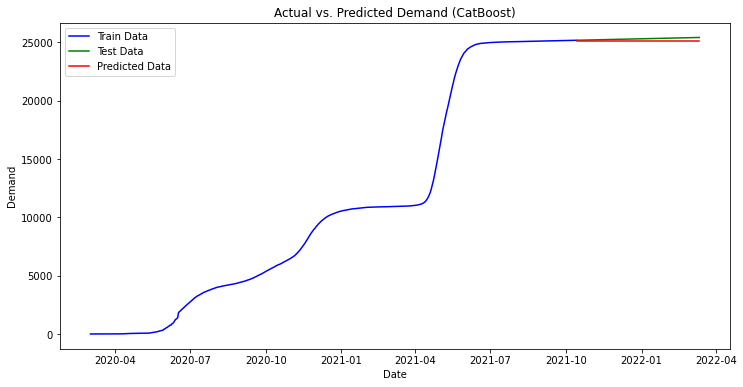

In [52]:
# Make predictions on the training and test sets
train_predictions = catboost_model.predict(train_pool)
test_predictions = catboost_model.predict(test_pool)

# Plot the actual values, training predictions, and testing predictions
plt.figure(figsize=(12, 6))
plt.plot(train_y.index, train_y, label='Train Data', color='blue')
plt.plot(test_y.index, test_y, label='Test Data', color='green')
plt.plot(test_y.index, test_predictions, label='Predicted Data', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.title('Actual vs. Predicted Demand (CatBoost)')
plt.show()

# 03- XGBoost

In [26]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt




In [27]:
# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
xgb_model.fit(train_X, train_y)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [28]:
# Make predictions on the test data
predictions = xgb_model.predict(test_X)

# Calculate the evaluation metrics
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, predictions)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R-squared (R2):', r2)

Mean Squared Error: 21611.415323825364
Mean Absolute Error: 129.7421875
Root Mean Squared Error: 147.0082151576073
R-squared (R2): -3.522749308755418


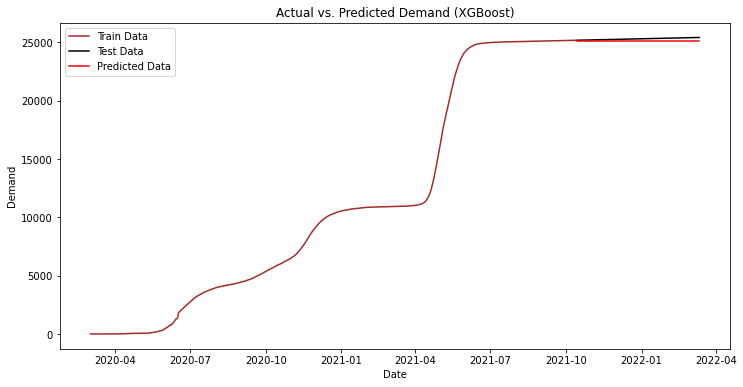

In [30]:
# Plot the actual values, training predictions, and testing predictions
plt.figure(figsize=(12, 6))
plt.plot(train_y.index, train_y, label='Train Data', color='brown')
plt.plot(test_y.index, test_y, label='Test Data', color='black')
plt.plot(test_y.index, test_predictions, label='Predicted Data', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.title('Actual vs. Predicted Demand (XGBoost)')
plt.show()

# 04- Prophet Algorithm

13:05:34 - cmdstanpy - INFO - Chain [1] start processing
13:05:36 - cmdstanpy - INFO - Chain [1] done processing


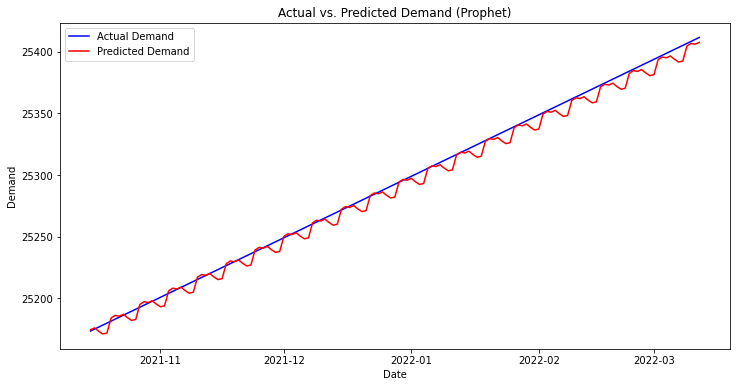

In [31]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
# Load the data
df = pd.read_csv('covid-19.csv', index_col='Date', parse_dates=True)
df = df[['Deaths', 'Cured','Confirmed']]

# Create a lagged version of the demand variable to use as features
df['Deaths_lagged'] = df['Deaths'].shift()


# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fill missing values with 1 (alternatively, you can use other methods to handle missing values)
train = train.fillna(1)
test = test.fillna(1)

# Prepare the DataFrame for Prophet
train_prophet = train.reset_index()
train_prophet.rename(columns={'Date': 'ds', 'Deaths': 'y'}, inplace=True)

# Train the Prophet model
prophet_model = Prophet()
prophet_model.add_regressor('Cured')
prophet_model.add_regressor('Confirmed')
prophet_model.fit(train_prophet)

# Make future predictions for the test set
test_prophet = test.reset_index()
test_prophet.rename(columns={'Date': 'ds', 'Deaths': 'y'}, inplace=True)
test_prophet['Cured'] = test['Cured'].values
test_prophet['Confirmed'] = test['Confirmed'].values

forecast = prophet_model.predict(test_prophet)

# Extracting the actual and predicted values
actual_values = test['Deaths'].values
predicted_values = forecast['yhat'].values

# Plot the actual values and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, actual_values, label='Actual Demand', color='blue')
plt.plot(test.index, predicted_values, label='Predicted Demand', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Actual vs. Predicted Demand (Prophet)')
plt.legend()
plt.show()


In [33]:
# Calculate the evaluation metrics
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
rmse = np.sqrt(mse)


print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared (R2):', r2)
print('Root Mean Squared Error:', rmse)


Mean Squared Error: 21611.415323825364
Mean Absolute Error: 129.7421875
R-squared (R2): -3.522749308755418
Root Mean Squared Error: 147.0082151576073


# Computational Complexity Analysis

13:05:38 - cmdstanpy - INFO - Chain [1] start processing
13:05:38 - cmdstanpy - INFO - Chain [1] done processing


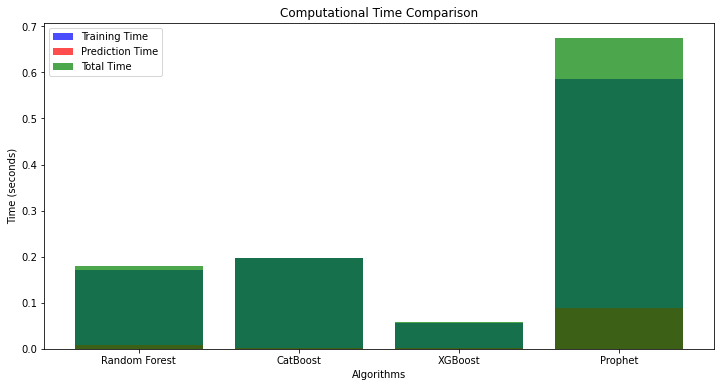

Random Forest - Training Time: 0.1716 seconds
Random Forest - Prediction Time: 0.0090 seconds
Random Forest - Total Time: 0.1805 seconds

CatBoost - Training Time: 0.1965 seconds
CatBoost - Prediction Time: 0.0010 seconds
CatBoost - Total Time: 0.1975 seconds

XGBoost - Training Time: 0.0568 seconds
XGBoost - Prediction Time: 0.0020 seconds
XGBoost - Total Time: 0.0588 seconds

Prophet - Training Time: 0.5854 seconds
Prophet - Prediction Time: 0.0888 seconds
Prophet - Total Time: 0.6742 seconds



In [34]:
# Store the algorithm names
import time

algorithm_names = ['Random Forest', 'CatBoost', 'XGBoost', 'Prophet']

# Initialize lists to store training, prediction, and total times
training_times = []
prediction_times = []
total_times = []

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
start_time = time.time()
rf_model.fit(train_X, train_y)
training_time_rf = time.time() - start_time

start_time = time.time()
rf_predictions = rf_model.predict(test_X)
prediction_time_rf = time.time() - start_time

# CatBoost
catboost_model = CatBoostRegressor(n_estimators=100, random_state=0, verbose=0)
start_time = time.time()
catboost_model.fit(train_X, train_y)
training_time_catboost = time.time() - start_time

start_time = time.time()
catboost_predictions = catboost_model.predict(test_X)
prediction_time_catboost = time.time() - start_time

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
start_time = time.time()
xgb_model.fit(train_X, train_y)
training_time_xgb = time.time() - start_time

start_time = time.time()
xgb_predictions = xgb_model.predict(test_X)
prediction_time_xgb = time.time() - start_time

# Prophet
train_prophet = train[['Deaths']].reset_index()
train_prophet.rename(columns={'Date': 'ds', 'Deaths': 'y'}, inplace=True)

prophet_model = Prophet()
start_time = time.time()
prophet_model.fit(train_prophet)
training_time_prophet = time.time() - start_time

test_prophet = test[['Deaths']].reset_index()
test_prophet.rename(columns={'Date': 'ds', 'Deaths': 'y'}, inplace=True)
test_prophet['Cured'] = test['Cured'].values
test_prophet['Confirmed'] = test['Confirmed'].values

start_time = time.time()
forecast = prophet_model.predict(test_prophet)
prophet_predictions = forecast['yhat'].values
prediction_time_prophet = time.time() - start_time

# Calculate total times
total_time_rf = training_time_rf + prediction_time_rf
total_time_catboost = training_time_catboost + prediction_time_catboost
total_time_xgb = training_time_xgb + prediction_time_xgb
total_time_prophet = training_time_prophet + prediction_time_prophet

# Store times in lists
training_times = [training_time_rf, training_time_catboost, training_time_xgb, training_time_prophet]
prediction_times = [prediction_time_rf, prediction_time_catboost, prediction_time_xgb, prediction_time_prophet]
total_times = [total_time_rf, total_time_catboost, total_time_xgb, total_time_prophet]

# Create a bar plot to visualize the training, prediction, and total times
plt.figure(figsize=(12, 6))
plt.bar(algorithm_names, training_times, label='Training Time', color='blue', alpha=0.7)
plt.bar(algorithm_names, prediction_times, label='Prediction Time', color='red', alpha=0.7)
plt.bar(algorithm_names, total_times, label='Total Time', color='green', alpha=0.7)
plt.xlabel('Algorithms')
plt.ylabel('Time (seconds)')
plt.title('Computational Time Comparison')
plt.legend()
plt.show()

# Print the values
for i, algorithm in enumerate(algorithm_names):
    print(f'{algorithm} - Training Time: {training_times[i]:.4f} seconds')
    print(f'{algorithm} - Prediction Time: {prediction_times[i]:.4f} seconds')
    print(f'{algorithm} - Total Time: {total_times[i]:.4f} seconds')
    print()
